In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
import pandas as pd

In [67]:
with open('pyro_bo_test.pkl', 'rb') as f:
    res_dict = pickle.load(f)


In [69]:
with open('pyro_bo_mrep_1.pkl', 'rb') as f:
    res_dict_test = pickle.load(f)

In [72]:
res_dict_test['MC']['10']

[{u'X': array([[0.37454012, 0.9507143 ],
         [0.7319939 , 0.5986585 ],
         [0.15601864, 0.15599452],
         [0.05808361, 0.8661761 ],
         [0.601115  , 0.7080726 ],
         [0.02058449, 0.96990985],
         [0.83244264, 0.21233912],
         [0.9999304 , 0.9995309 ],
         [0.49303895, 0.82370794]], dtype=float32),
  u'y': array([0.46784994, 0.25210053, 0.48648015, 0.573912  , 0.23134054,
         0.67130804, 0.4396213 , 0.7067259 , 0.32378277], dtype=float32)}]

In [21]:
mc_y = np.array([res['y'] for res in res_dict['MC']])
rqmc_y = np.array([res['y'] for res in res_dict['RQMC']])

In [45]:
mc_x = np.array([res['X'] for res in res_dict['MC']])
rqmc_x = np.array([res['X'] for res in res_dict['RQMC']])

mc_x_reshape = mc_x[:,7:,:].reshape(-1,2)
rqmc_x_reshape = rqmc_x[:,7:,:].reshape(-1,2)

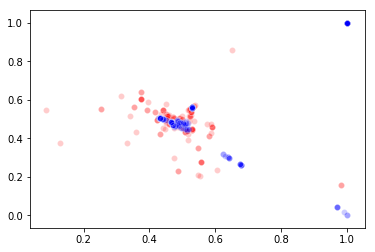

In [58]:
sns.scatterplot(mc_x_reshape[:,0], mc_x_reshape[:,1], color='red', alpha=0.2)
sns.scatterplot(rqmc_x_reshape[:,0], rqmc_x_reshape[:,1], color='blue', alpha=0.2)

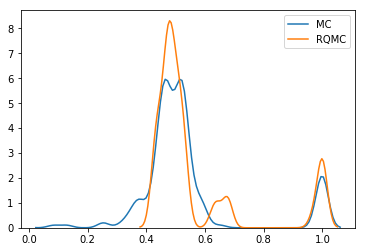

In [62]:
sns.kdeplot(mc_x_reshape[:,0], label='MC')
sns.kdeplot(rqmc_x_reshape[:,0], label='RQMC')

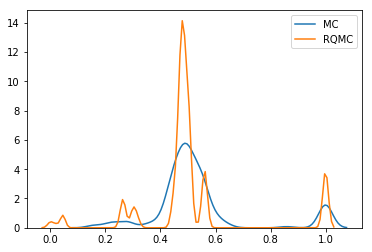

In [63]:
sns.kdeplot(mc_x_reshape[:,1], label='MC')
sns.kdeplot(rqmc_x_reshape[:,1], label='RQMC')

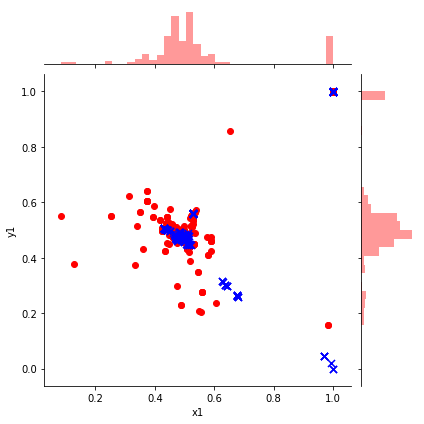

In [57]:
df1 = pd.DataFrame(mc_x_reshape, columns=['x1', 'y1'])
df2 = pd.DataFrame(rqmc_x_reshape, columns=['x2', 'y2'])


# plot
# ========================================   
graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r')

graph.x = df2.x2
graph.y = df2.y2
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)

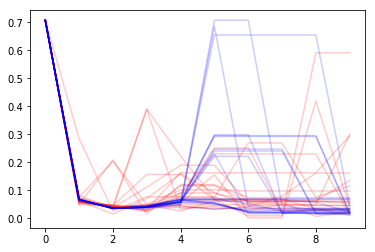

In [26]:
plt.plot(mc_y[:,7:].transpose(),alpha=0.2, color="red" )
plt.plot(rqmc_y[:,7:].transpose(), alpha=0.2, color="blue")

{'boxes': [<matplotlib.lines.Line2D at 0x7f1bc001aad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1bc0023350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1bc0023e90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1bc0023ad0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1bc001ab90>,
  <matplotlib.lines.Line2D at 0x7f1bc002fa10>]}

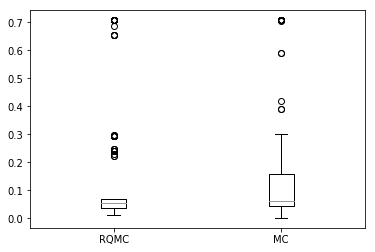

In [66]:
plt.boxplot([rqmc_y[:,7:].flatten(), mc_y[:,7:].flatten()], labels=['RQMC', 'MC'])